## DAPALL - MAPS
we are looking for MAPS files under the datatype: 

dapname = 'manga-'+plate+'-'+ifudesign+'-MAPS-SPX-MILESHC-MASTARHC2.fits.gz'

website: https://www.sdss.org/dr17/manga/manga-tutorials/dapall/

Let's start with a little tutorial found in the link above.

In [9]:
'''
First open the file and select those entries with successful 
analysis from the DAP using the HYB10-MILESHC-MASTARSSP method.
'''

import numpy as np
from astropy.io import fits

dapall = fits.open('/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits')['HYB10-MILESHC-MASTARSSP'].data
indx = dapall['DAPDONE'] == 1
tbdata = dapall[indx]


[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits' mode='rb' closefd=True> (ResourceWarning)


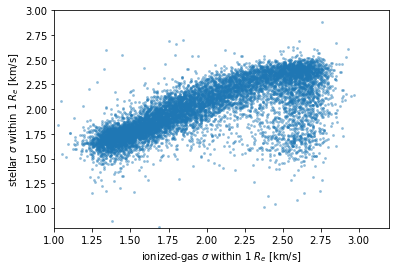

In [10]:
'''
We can use this file to make a simple plot of stellar vs. gas velocity 
dispersion within the effective radius, for example:
'''

import matplotlib.pyplot as plt
plt.scatter(np.ma.log10(tbdata['ha_gsigma_1re']),
               np.ma.log10(tbdata['stellar_sigma_1re']),
               alpha=0.5, marker='.', s=30, lw=0)
plt.xlim(1,3.2)
plt.ylim(0.8,3)
plt.xlabel(r'ionized-gas $\sigma$ within 1 $R_e$ [km/s]')
plt.ylabel(r'stellar $\sigma$ within 1 $R_e$ [km/s]')
plt.show()


OK, then let's find the plateifu in the catalog:

In [21]:
hdul = fits.open('/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits')['SPX-MILESHC-MASTARSSP'].data
plateifu = hdul['plateifu']
plate = hdul['plate']
ifu = hdul['ifudesign']
len(hdul)

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits' mode='rb' closefd=True> (ResourceWarning)


10782

In [29]:
#Create a file containing all the target we want to download
with open('DAP_TARGET.txt', 'w') as f:
    for i in range(len(hdul)):
        targeturl = 'https://data.sdss.org/sas/dr15/manga/spectro/analysis/v2_4_3/2.2.1/SPX-MILESHC-MASTARHC/'+str(plate[i])+'/'+str(ifu[i])+'/manga-'+str(plateifu[i])+'-MAPS-SPX-MILESHC-MASTARHC.fits.gz\n'
        f.write(targeturl)

